<h1>LINEAR REGERESSION</h1>
not a regression , is a classification only

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer


In [26]:
url = "https://archive.ics.uci.edu/static/public/45/data.csv" 
heart_disease_df = pd.read_csv(url)

# Check the first few rows of the dataset
print(heart_disease_df.head())



   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope   ca  thal  num
0   63    1   1       145   233    1  ...      0      2.3      3  0.0   6.0    0
1   67    1   4       160   286    0  ...      1      1.5      2  3.0   3.0    2
2   67    1   4       120   229    0  ...      1      2.6      2  2.0   7.0    1
3   37    1   3       130   250    0  ...      0      3.5      3  0.0   3.0    0
4   41    0   2       130   204    0  ...      0      1.4      1  0.0   3.0    0

[5 rows x 14 columns]


In [27]:
print(heart_disease_df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [31]:
X = heart_disease_df.drop(columns='num')
y = heart_disease_df['num']

#since there are NaN values in this dataset
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)


In [32]:
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


In [37]:
mse = mean_squared_error(y_test, y_pred)
print(f"the mean squared error is : {mse: .4f}")

the mean squared error is :  0.7144


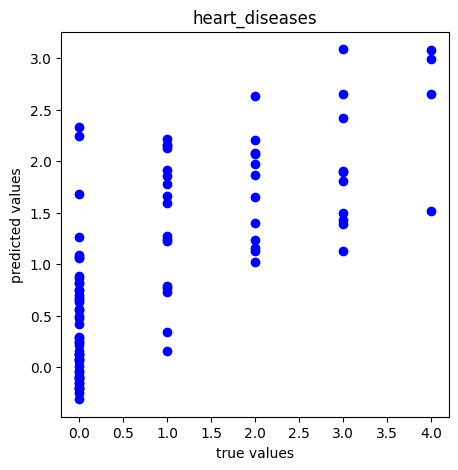

In [39]:
plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=y_pred, color="blue")
plt.title("heart_diseases")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.show()

<h1>LOGISTIC REGRESSION</h1>

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [53]:
model = LogisticRegression(solver='saga', max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')


Accuracy: 0.5494505494505495
Confusion Matrix:
 [[42  3  2  1  0]
 [ 5  4  3  5  0]
 [ 3  3  1  5  0]
 [ 1  3  2  3  1]
 [ 0  1  0  3  0]]
